In [124]:
import os
import scipy.io
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

img_dir = "/home/stevenyang/Desktop/cmput469/YOLO/NWPU_60_357/img"
# img_dir = "/home/stevenyang/Desktop/cmput469/CLIP-EBC/data/ShanghaiTech/part_B/test_data/images"
mat_dir = "/home/stevenyang/Desktop/cmput469/YOLO/NWPU_60_357/mats"
# mat_dir = "/home/stevenyang/Desktop/cmput469/CLIP-EBC/data/ShanghaiTech/part_B/test_data/ground-truth"
model = YOLO("/home/stevenyang/Desktop/cmput469/YOLO/runs/detect/crowd_counting_v112/weights/best.pt")

In [125]:
import os
import cv2
import scipy.io
import matplotlib.pyplot as plt

def plot_ground_truth_and_prediction(index):
    img_files = sorted(os.listdir(img_dir))
    if index < 0 or index >= len(img_files):
        print("Index out of range.")
        return

    img_file = img_files[index]
    img_path = os.path.join(img_dir, img_file)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    results = model.predict(source=img_path, conf=0.5)
    predicted_count = sum(len(result.boxes) for result in results)

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))  
    plt.title(f"Predicted: {predicted_count}")
    plt.axis("off")

    plt.show()


In [126]:
def plot_ground_truth_and_prediction(index):
    img_files = sorted(os.listdir(img_dir))
    if index < 0 or index >= len(img_files):
        print("Index out of range.")
        return

    img_file = img_files[index]
    img_path = os.path.join(img_dir, img_file)
    mat_path = os.path.join(mat_dir, img_file.replace(".jpg", ".mat"))

    if not os.path.exists(mat_path):
        print(f"Annotation file {mat_path} not found.")
        return

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mat_data = scipy.io.loadmat(mat_path)
    ann_boxes = mat_data['annBoxes']

    results = model.predict(source=img_path, conf=0.5)
    pred_img = img.copy()

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    for box in ann_boxes:
        x_min, y_min, x_max, y_max = box
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='red', linewidth=2, fill=False))
    plt.title("Ground Truth")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    for result in results:
        for box in result.boxes.xyxy:
            x_min, y_min, x_max, y_max = box.tolist()
            cv2.rectangle(pred_img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
    plt.imshow(pred_img)
    plt.title("Predicted Bounding Boxes")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [127]:
def plot_ground_truth_and_prediction(index):
    img_files = sorted(os.listdir(img_dir))
    if index < 0 or index >= len(img_files):
        print("Index out of range.")
        return

    img_file = img_files[index]
    img_path = os.path.join(img_dir, img_file)
    mat_path = os.path.join(mat_dir, img_file.replace(".jpg", ".mat"))

    if not os.path.exists(mat_path):
        print(f"Annotation file {mat_path} not found.")
        return

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mat_data = scipy.io.loadmat(mat_path)
    ann_boxes = mat_data['annBoxes']

    results = model.predict(source=img_path, conf=0.5)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    for box in ann_boxes:
        x_min, y_min, x_max, y_max = box
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='red', linewidth=2, fill=False))
    plt.title("Ground Truth")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    for result in results:
        img_with_boxes = result.plot()  
        img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
        plt.imshow(img_with_boxes_rgb)
    plt.title("Predicted Bounding Boxes")
    plt.axis("off")

    # Show the plot
    plt.tight_layout()
    plt.show()

In [128]:
import os
import cv2
import scipy.io
import matplotlib.pyplot as plt
import torch

def plot_ground_truth_and_prediction(index):
    img_files = sorted(os.listdir(img_dir))
    if index < 0 or index >= len(img_files):
        print("Index out of range.")
        return

    img_file = img_files[index]
    img_path = os.path.join(img_dir, img_file)
    mat_path = os.path.join(mat_dir, img_file.replace(".jpg", ".mat"))

    if not os.path.exists(mat_path):
        print(f"Annotation file {mat_path} not found.")
        return

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mat_data = scipy.io.loadmat(mat_path)
    ground_truth_count = len(mat_data['annBoxes'])  

    results = model.predict(source=img_path, conf=0.5)

    predicted_count = sum(len(result.boxes) for result in results)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)

    for result in results:
        for box in result.boxes.xyxy.cpu().numpy():  # Move tensor to CPU before converting
            x_min, y_min, x_max, y_max = box[:4]
            plt.gca().add_patch(
                plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                              edgecolor='blue', linewidth=2, fill=False)
            )

    plt.title(f"Predicted: {predicted_count}, Ground Truth: {ground_truth_count}")
    plt.axis("off")
    plt.show()


image 1/1 /home/stevenyang/Desktop/cmput469/YOLO/NWPU_60_357/img/0357.jpg: 1280x1280 (no detections), 171.2ms
Speed: 15.0ms preprocess, 171.2ms inference, 4.7ms postprocess per image at shape (1, 3, 1280, 1280)


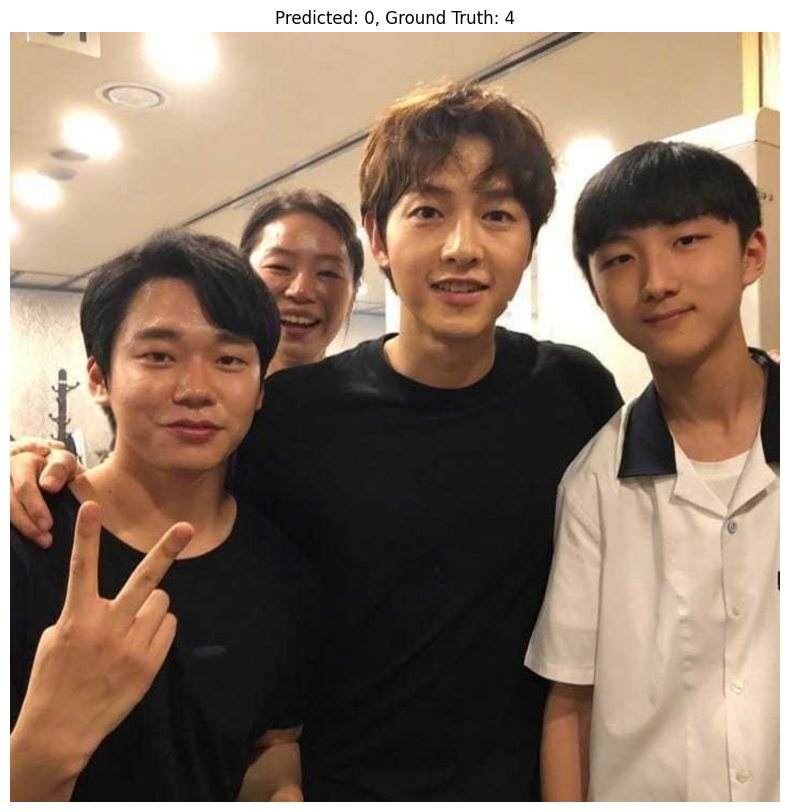

In [131]:
plot_ground_truth_and_prediction(356)